# RNN预测股价

In [1]:
#数据加载
import pandas as pd
import numpy as np
data_train = pd.read_csv('task1_data_train.csv')
data_train.head()

,date,open,high,low,close,volume
0,2015/1/5,156.8681,168.9629,156.0988,167.5400,94515
1,2015/1/6,165.4553,167.5731,162.1627,163.6601,55020
2,2015/1/7,162.1793,165.0416,157.1742,159.6147,54797
3,2015/1/8,160.4916,160.9218,157.2983,158.6385,40525
4,2015/1/9,157.5134,161.9559,157.2735,157.4390,53982


In [2]:
#获取收盘价格
price_close = data_train.loc[:,'close']
price_close.head()

0    167.5400
1    163.6601
2    159.6147
3    158.6385
4    157.4390
Name: close, dtype: float64

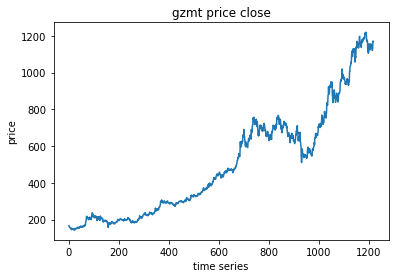

In [3]:
#数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.plot(price_close)
plt.title('gzmt price close')
plt.xlabel('time series')
plt.ylabel('price')
plt.show()

In [4]:
#数据预处理》归一化
price_n = price_close/max(price_close)
print(price_n)

0       0.137384
1       0.134202
2       0.130885
3       0.130085
4       0.129101
          ...   
1214    0.918906
1215    0.920041
1216    0.942655
1217    0.961135
1218    0.958865
Name: close, Length: 1219, dtype: float64


In [5]:
#数据序列提取方法
def extract_data(data,time_step=10):
    X = []
    y = []
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X = np.array(X)
    X = X.reshape(X.shape[0],X.shape[1],1)
    return X,y

In [6]:
#方法测试
test_data = [i for i in range(1,10)]
test_step = 5
X,y = extract_data(test_data,test_step)
print(test_data)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[6, 7, 8, 9]


In [7]:
#股票价格数据处理
time_step = 10
X,y = extract_data(price_n,time_step)
print(X[0:2,:,:])
print(y)

[[[0.13738403]
  [0.13420248]
  [0.13088522]
  [0.13008473]
  [0.12910113]
  [0.12646899]
  [0.12541758]
  [0.12426432]
  [0.12622479]
  [0.12625194]]

 [[0.13420248]
  [0.13088522]
  [0.13008473]
  [0.12910113]
  [0.12646899]
  [0.12541758]
  [0.12426432]
  [0.12622479]
  [0.12625194]
  [0.11904087]]]
[0.11904087351116396, 0.12080462726854004, 0.12370802720751509, 0.12294148435922128, 0.12279904908670455, 0.12400650987415923, 0.12218166557100021, 0.12039076957113536, 0.11949532157120293, 0.12019404981364104, 0.11859314951119775, 0.12100134702603434, 0.1202415282378133, 0.1180708048445705, 0.11844390817787567, 0.12502405696492494, 0.12406079435913682, 0.12424398399575304, 0.12452885454078648, 0.1237962599957868, 0.1243524709649756, 0.12361307035917059, 0.12479347090486907, 0.12661150914722272, 0.1296030598737369, 0.12938600393455915, 0.12614336696484046, 0.12698461248052792, 0.12585169035900168, 0.12456280284408063, 0.1299491029652859, 0.12741872435888343, 0.13023397351031937, 0.130756

In [8]:
#确认数据维度
print(X.shape,len(y))

(1209, 10, 1) 1209


In [9]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
#添加RNN层
model.add(SimpleRNN(units=5,input_shape=(10,1),activation='relu'))
#输出层
model.add(Dense(units=1,activation='linear'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [10]:
#模型配置
model.compile(optimizer='adam',loss='mean_squared_error')

In [11]:
#模型训练
model.fit(X,y,batch_size=30,epochs=200)

Epoch 1/200
1209/1209 [==============================] - 1s 450us/step - loss: 0.0183
Epoch 2/200
1209/1209 [==============================] - 0s 140us/step - loss: 0.0032
Epoch 3/200
1209/1209 [==============================] - 0s 137us/step - loss: 0.0021
Epoch 4/200
1209/1209 [==============================] - 0s 136us/step - loss: 0.0015
Epoch 5/200
1209/1209 [==============================] - 0s 133us/step - loss: 9.5976e-04
Epoch 6/200
1209/1209 [==============================] - 0s 140us/step - loss: 5.8591e-04
Epoch 7/200
1209/1209 [==============================] - 0s 144us/step - loss: 3.3750e-04
Epoch 8/200
1209/1209 [==============================] - 0s 169us/step - loss: 2.0280e-04
Epoch 9/200
1209/1209 [==============================] - 0s 167us/step - loss: 1.3472e-04
Epoch 10/200
1209/1209 [==============================] - 0s 165us/step - loss: 1.0599e-04
Epoch 11/200
1209/1209 [==============================] - 0s 160us/step - loss: 9.5247e-05
Epoch 12/200
1209/1209 [

1209/1209 [==============================] - 0s 144us/step - loss: 9.2772e-05
Epoch 91/200
1209/1209 [==============================] - 0s 138us/step - loss: 9.0776e-05
Epoch 92/200
1209/1209 [==============================] - 0s 140us/step - loss: 9.2670e-05
Epoch 93/200
1209/1209 [==============================] - 0s 138us/step - loss: 9.1755e-05
Epoch 94/200
1209/1209 [==============================] - 0s 140us/step - loss: 9.0591e-05
Epoch 95/200
1209/1209 [==============================] - 0s 158us/step - loss: 9.0804e-05
Epoch 96/200
1209/1209 [==============================] - 0s 163us/step - loss: 9.1026e-05
Epoch 97/200
1209/1209 [==============================] - 0s 169us/step - loss: 9.2300e-05
Epoch 98/200
1209/1209 [==============================] - 0s 164us/step - loss: 9.2282e-05
Epoch 99/200
1209/1209 [==============================] - 0s 162us/step - loss: 9.4079e-05
Epoch 100/200
1209/1209 [==============================] - 0s 164us/step - loss: 9.3439e-05
Epoch 101/2

1209/1209 [==============================] - 0s 141us/step - loss: 9.2546e-05
Epoch 180/200
1209/1209 [==============================] - 0s 142us/step - loss: 9.9276e-05
Epoch 181/200
1209/1209 [==============================] - 0s 138us/step - loss: 9.4188e-05
Epoch 182/200
1209/1209 [==============================] - 0s 145us/step - loss: 9.3895e-05
Epoch 183/200
1209/1209 [==============================] - ETA: 0s - loss: 9.2760e-0 - 0s 141us/step - loss: 9.1439e-05
Epoch 184/200
1209/1209 [==============================] - 0s 140us/step - loss: 9.1273e-05
Epoch 185/200
1209/1209 [==============================] - 0s 158us/step - loss: 9.7987e-05
Epoch 186/200
1209/1209 [==============================] - 0s 166us/step - loss: 9.1917e-05
Epoch 187/200
1209/1209 [==============================] - 0s 169us/step - loss: 9.4527e-05
Epoch 188/200
1209/1209 [==============================] - 0s 160us/step - loss: 9.1253e-05
Epoch 189/200
1209/1209 [==============================] - 0s 163u

In [12]:
#结果预测
y_train_predict = model.predict(X)
y_train_predict = y_train_predict*max(price_close)
print(y_train_predict)

[[ 154.24727]
 [ 146.95708]
 [ 147.57095]
 ...
 [1123.4388 ]
 [1146.3274 ]
 [1168.8931 ]]


In [13]:
y = [i*max(price_close) for i in y]
print(y)

[145.1705, 147.3214, 150.8621, 149.9273, 149.7536, 151.2261, 149.0007, 146.8167, 145.7247, 146.5768, 144.6245, 147.5613, 146.6347, 143.9875, 144.4425, 152.467, 151.2923, 151.5157, 151.8631, 150.9697, 151.648, 150.7463, 152.1858, 154.4029, 158.0511, 157.7864, 153.832, 154.8579, 153.4763, 151.9045, 158.4731, 155.3873, 158.82050000000004, 159.4575, 157.1081, 160.29309999999998, 162.7832, 165.0003, 161.5505, 159.78839999999997, 161.3851, 161.8897, 159.4823, 164.264, 160.9466, 162.7832, 162.1131, 161.6002, 160.9714, 162.81629999999998, 166.0095, 169.178, 165.4553, 165.6373, 168.6816, 170.4189, 170.1707, 187.1878, 192.3914, 193.6075, 212.9658, 218.31, 211.8158, 213.8427, 211.609, 205.0735, 206.6371, 208.66389999999998, 210.93070000000003, 199.33220000000003, 200.7634, 202.6248, 210.2688, 212.97400000000002, 210.4757, 212.1137, 207.9855, 202.82329999999996, 199.4894, 206.8522, 210.0868, 213.92540000000002, 228.2125, 237.2877, 236.2205, 229.0728, 216.0101, 218.2603, 224.5724, 220.5684, 217.4, 

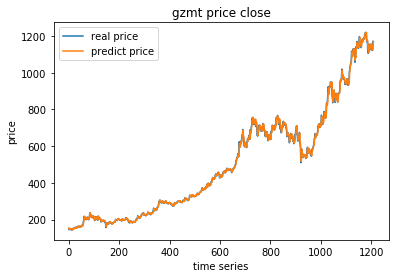

In [14]:
#数据可视化
fig2 = plt.figure()
plt.plot(y,label='real price')
plt.plot(y_train_predict,label='predict price')
plt.title('gzmt price close')
plt.xlabel('time series')
plt.ylabel('price')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import r2_score
r2_train = r2_score(y,y_train_predict)
print(r2_train)

0.9984885044172649


In [16]:
#有的小伙伴训练一次以后发现预测出来的结果不理想，很可能是模型进行初始化的时候选取的随机系数不合适，导致梯度下降搜索时遇到了局部极小值
#解决办法：尝试再次建立模型并训练
#多层感知机结构在进行模型求解时，会给定一组随机的初始化权重系数，这种情况是正常的。通常我们可以观察损失函数是否在变小来发现模型求解是否正常

In [17]:
#测试集数据
data_test = pd.read_csv('task1_data_test.csv')
data_test.head()
price_test = data_test.loc[:,'close']
price_test.head()
#归一化
price_test_n = price_test/max(price_close)
print(price_test_n)

0      0.915907
1      0.874213
2      0.873751
3      0.887157
4      0.881978
         ...   
163    1.470273
164    1.451413
165    1.413283
166    1.403361
167    1.384172
Name: close, Length: 168, dtype: float64


In [18]:
#测试数据的序列提取
X_test, y_test = extract_data(price_test_n,time_step)
print(X_test.shape,len(y_test))

(158, 10, 1) 158


In [19]:
#测试数据的1预测
y_test_predict = model.predict(X_test)
y_test_predict = y_test_predict*max(price_close)
print(y_test_predict)

[[1100.199 ]
 [1096.1879]
 [1096.0289]
 [1082.2965]
 [1067.144 ]
 [1064.7732]
 [1045.6036]
 [1002.1052]
 [1023.1553]
 [1036.3004]
 [1055.9963]
 [1063.2456]
 [1056.6989]
 [1081.6312]
 [1085.058 ]
 [1080.555 ]
 [1077.2867]
 [1081.5889]
 [1074.135 ]
 [1083.3043]
 [1102.4888]
 [1101.446 ]
 [1080.0778]
 [1066.3671]
 [1063.1483]
 [1073.929 ]
 [1050.5464]
 [1070.8038]
 [1096.2283]
 [1113.6958]
 [1151.2955]
 [1144.6505]
 [1109.4205]
 [1138.3132]
 [1144.9619]
 [1129.701 ]
 [1105.2589]
 [1064.0756]
 [1039.206 ]
 [1004.3798]
 [ 988.801 ]
 [1018.6006]
 [1009.979 ]
 [1039.3016]
 [1063.8278]
 [1055.4785]
 [1062.8503]
 [1061.1246]
 [1093.1332]
 [1091.6525]
 [1126.3153]
 [1127.4777]
 [1144.5906]
 [1147.0326]
 [1146.5775]
 [1151.7672]
 [1150.4408]
 [1169.0547]
 [1175.7816]
 [1183.163 ]
 [1208.2106]
 [1213.3904]
 [1191.7522]
 [1225.0052]
 [1236.7009]
 [1237.4122]
 [1258.4678]
 [1264.5131]
 [1262.0648]
 [1254.0502]
 [1281.099 ]
 [1295.3502]
 [1299.9734]
 [1307.6266]
 [1317.1667]
 [1321.1554]
 [1314.1046]

In [20]:
y_test = [i*max(price_close) for i in y_test]
print(y_test)

[1094.2152, 1094.7094, 1078.4, 1062.8813, 1063.0889, 1040.6411, 992.3257, 1026.022, 1037.8636, 1058.631, 1063.5732, 1054.173, 1085.3191, 1084.5976, 1078.4, 1075.4346, 1081.1874, 1071.4808, 1083.8365, 1105.0882, 1100.0273, 1074.6241, 1062.397, 1061.2998, 1074.8317, 1044.7926, 1073.4676, 1100.1459, 1115.882, 1157.476, 1142.1551, 1101.1442, 1142.6493, 1145.1402, 1125.3514, 1099.1871, 1054.6772, 1033.0301, 996.3487, 984.4971, 1023.3235, 1007.2315, 1043.8042, 1067.6259, 1052.6212, 1063.079, 1059.6194, 1098.1689999999999, 1090.2614, 1131.7763, 1126.6265, 1146.5537, 1146.3659, 1145.1204, 1151.5453, 1148.8765, 1171.4132, 1175.8612, 1183.2746, 1211.8409, 1213.1258, 1186.1411, 1230.1272000000001, 1237.7976000000003, 1236.1172, 1261.2634, 1264.3572, 1260.1761, 1251.0824, 1284.9862, 1296.8476, 1299.4275, 1307.7305, 1317.6051000000002, 1320.521, 1311.2691, 1297.8361, 1330.6625, 1330.5637, 1335.3972000000003, 1350.3228, 1312.8605, 1347.1598, 1342.3164, 1322.5474, 1328.4781000000003, 1350.8171, 1403.

In [21]:
#r2 
r2_test = r2_score(y_test,y_test_predict)
print(r2_test)

0.9889293780236674


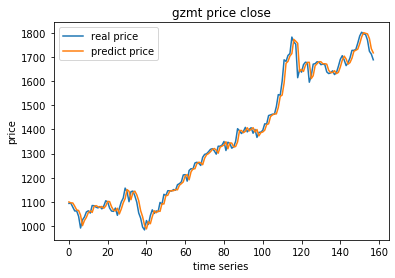

In [22]:
#数据可视化
fig3 = plt.figure()
plt.plot(y_test,label='real price')
plt.plot(y_test_predict,label='predict price')
plt.title('gzmt price close')
plt.xlabel('time series')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
#数据存储
y_test_r = np.array(y_test).reshape(-1,1)
print(y_test_r.shape)
print(y_test_predict.shape)
final_result = np.concatenate((y_test_r,y_test_predict),axis=1)
print(final_result)
final_result_df = pd.DataFrame(final_result,columns=['real price','predict price'])
final_result_df.to_csv('predict_test.csv')

![materials](materials2.png)